In [40]:
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import numpy as np
import random
import time
import MySQLdb   

In [149]:
db= MySQLdb.connect(host="giniewicz.it",    # host
                     user="team6",         # username
                     passwd="t64mP@ss6",  # password
                     db="team6",charset = 'utf8') 
mycursor = db.cursor() #for sql

In [120]:
mycursor.execute("SELECT idz7,data_adopcji FROM adopcja")
adopcja=mycursor.fetchall()

In [121]:
#zwierząrtka adoptowane
idz7=[]
data_adopcji=[]
for i in range(0,len(adopcja)):
    idz7.append(adopcja[i][0])
    data_adopcji.append(adopcja[i][1])

In [122]:
mycursor.execute("SELECT idz,data_przyjecia FROM zwierzeta")
zwierzeta=mycursor.fetchall()

In [123]:
#wszystkie zwierzątka
idz=[]
data_przyjecia=[]
for i in range(0,len(zwierzeta)):
    idz.append(zwierzeta[i][0])
    data_przyjecia.append(zwierzeta[i][1])

In [124]:
#dodaję do adoptowanych te które czekają  na adopcję (patrz punkt 4)
idz_nowe=idz7
daty_nowe=data_adopcji
for i in range(0,len(idz1)):
    idz_nowe.append(idz1[i])
    daty_nowe.append(end_przyj)
#tworzę nowe dane, żeby daty posortować razem z idz
dane_nowe=[]
for i in range(0,len(idz_nowe)):
    dane_nowe.append((idz_nowe[i],daty_nowe[i]))
#moje dane końcowe
dane_koncowe=sorted(dane_nowe)

In [125]:
#wyciągam tylko daty, idz są takie jak zawsze
data_koncowa=[]
for i in range(0,len(dane_koncowe)):
    data_koncowa.append(dane_koncowe[i][1])


In [126]:
#potrzebne do wykresu
liczba2=0
ilosc2=[]
daty2=[]
for j in range(2016,2020):
    for k in range(1,13):
        data=datetime.date(j, k, 1)
        if data<=end_przyj:
            for i in range(0,len(idz)):
                if data_przyjecia[i]<=data<=data_koncowa[i]:
                    liczba2+=1
            ilosc2.append(liczba2)
            daty2.append(str(data))
            liczba2=0
#TO MI COS NIE DZIALA :(

In [127]:
len(dane_koncowe)

153

NameError: name 'title' is not defined

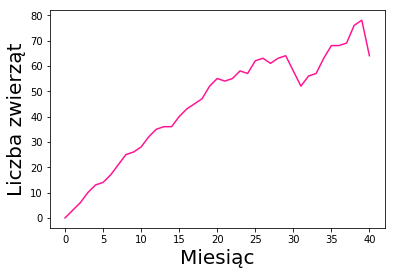

In [128]:
#rysuję wykresik
plt.plot(ilosc2,color='deeppink')
plt.xlabel('Miesiąc',size=20)
plt.ylabel('Liczba zwierząt',size=20)
plt.title('Liczba zwierząt w czasie',color='limegreen',size=30)

In [129]:
mycursor.execute("SELECT data_start, data_koniec FROM wolontariusze")
wolontariusze=mycursor.fetchall()

In [130]:
data_start=[]
data_koniec=[]
for i in range(0,len(wolontariusze)):
    data_start.append(wolontariusze[i][0])
    data_koniec.append(wolontariusze[i][1])

In [131]:
end_przyj=datetime.date(2019, 5, 1)
for i in range(0,len(data_koniec)):
    if data_koniec[i]==None:
        data_koniec[i]=end_przyj

In [132]:
liczba=0
ilosc=[]
daty=[]
for j in range(2016,2020):
    for k in range(1,13):
        data=datetime.date(j, k, 1)
        if data<=end_przyj:
            for i in range(0,len(wolontariusze)):
                if data_start[i]<=data<=data_koniec[i]:
                    liczba+=1
            ilosc.append(liczba)
            daty.append(str(data))
            liczba=0

NameError: name 'title' is not defined

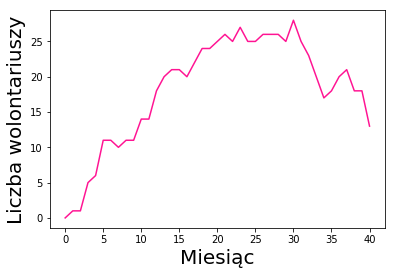

In [133]:
import matplotlib.pyplot as plt
plt.plot(ilosc,color='deeppink')
plt.xlabel('Miesiąc',size=20)
plt.ylabel('Liczba wolontariuszy',size=20)
title('Aktywni wolontariusze',color='limegreen',size=30)

In [134]:
#zwierzątka które nie zostały adoptowane 
mycursor.execute("""SELECT imie,data_przyjecia,idz,data_urodzenia FROM zwierzeta
                 LEFT JOIN adopcja ON zwierzeta.idz=adopcja.idz7 
                 LEFT JOIN zwierzeta_rodzaj ON zwierzeta.idz=zwierzeta_rodzaj.idz5
                 WHERE adopcja.idz7 IS NULL ORDER BY data_przyjecia""")
doadopcji=mycursor.fetchall()

In [135]:
import datetime
end_przyj=datetime.date(2019, 5, 1)
imie=[]
data_przyjecia=[]
idz1=[]
koniec=[]
wiek=[]

for i in range(0,len(doadopcji)):
    imie.append(doadopcji[i][0])
    data_przyjecia.append(doadopcji[i][1])
    idz1.append(doadopcji[i][2])
    koniec.append(end_przyj)
    wiek.append(round((end_przyj-doadopcji[i][3]).days/365,0))

In [136]:
#liczba dni które czekają, biedaczki :/
end_przyj=datetime.date(2019, 5, 1)
czas_oczekiwania=[]
for i in range(0,len(imie)):
    czas_oczekiwania.append((end_przyj-data_przyjecia[i]).days)

In [137]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'id zwierzątka':idz1,'imię zwierzątka':imie,'wiek':wiek,'czas oczekiwania':czas_oczekiwania })

In [138]:
import seaborn as sns
cm = sns.light_palette("deeppink", as_cmap=True)
df.head().style.hide_index()
s = df.style.background_gradient(cmap=cm,subset=['czas oczekiwania','wiek'])
#s = df.style.background_gradient(cmap=cm2,subset=['wiek'])
s

,id zwierzątka,imię zwierzątka,wiek,czas oczekiwania
0,110,Coco,5,1168
1,65,Gumisia,7,1147
2,89,Paddington,4,1145
3,58,Lady,10,1108
4,44,Shrek,8,1106
5,12,Shrek,8,1098
6,14,Psuja,10,1068
7,116,Hobbit,6,1047
8,139,Zaplątana,4,1041
9,147,Cypruś,6,912


(-1, 12)

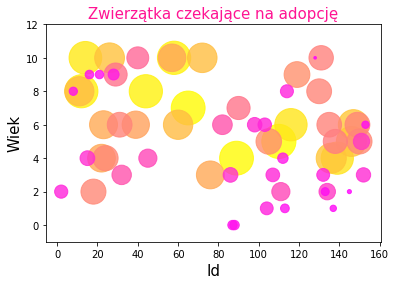

In [139]:
#zrobię ładnego bubble plota

import matplotlib.pyplot as plt
import numpy as np
 
# create data
x = np.random.rand(5)
y = np.random.rand(5)
z = np.random.rand(5)
 
# Change color with c and alpha
plt.scatter(idz1, wiek, s=czas_oczekiwania, cmap='spring', alpha=0.8,c=czas_oczekiwania)
plt.title('Zwierzątka czekające na adopcję',size=15,color='deeppink')
plt.xlabel('Id',size=15)
plt.ylabel('Wiek',size=15)
plt.ylim(-1,12)


#poszukiwania idealnego stworka


In [150]:
mycursor.execute('select idz2,aktywnosc,agresja,apetyt from zwierzeta_cechy where aktywnosc<3 and apetyt<3 and agresja<3')
zw=mycursor.fetchall()
idz=[]
aktywnosc=[]
agresja=[]
apetyt=[]
szczepiony=[]
wykastrowany=[]
imie=[]
for i in range(0,len(zw)):
    idz.append(zw[i][0])
    aktywnosc.append(zw[i][1])
    agresja.append(zw[i][2])
    apetyt.append(zw[i][3])    
mycursor.execute('select szczepiony,wykastrowany from zdrowie_zwierzat where idz1=2')
b=mycursor.fetchall()
szczepiony.append(b[0][0])
wykastrowany.append(b[0][0])

mycursor.execute('select szczepiony,wykastrowany from zdrowie_zwierzat where idz1=80')
b=mycursor.fetchall()
szczepiony.append(b[0][0])
wykastrowany.append(b[0][0])

mycursor.execute('select szczepiony,wykastrowany from zdrowie_zwierzat where idz1=144')
b=mycursor.fetchall()
szczepiony.append(b[0][0])
wykastrowany.append(b[0][0])

imie=['Szogun','Lady','Apollo']
wiek=[]

mycursor.execute('select data_urodzenia from zwierzeta  where idz=2')
a=mycursor.fetchall()
wiek.append(round((end_przyj-a[0][0]).days/365,0))

mycursor.execute('select data_urodzenia from zwierzeta  where idz=80')
a=mycursor.fetchall()
wiek.append(round((end_przyj-a[0][0]).days/365,0))

mycursor.execute('select data_urodzenia from zwierzeta  where idz=144')
a=mycursor.fetchall()
wiek.append(round((end_przyj-a[0][0]).days/365,0))

czy_adoptowany=["NIE","TAK","TAK"]

gatunek=["kot","pies","pies"]

In [151]:
df = pd.DataFrame({'id zwierzątka':idz,'imię':imie,'wiek':wiek,'gatunek':gatunek,
                   'aktywność':aktywnosc,'agresja':agresja,'apetyt':apetyt,'szczepiony':szczepiony,
                  'wykastrowany':wykastrowany,'Adoptowany?':czy_adoptowany})

In [142]:
import seaborn as sns
cm = sns.light_palette("deeppink", as_cmap=True)
(df.style
    .background_gradient(cmap=cm)
    .set_caption('W poszukiwaniu idealnego zwierzątka')
)
#s = df.style.background_gradient(cmap=cm2,subset=['wiek'])
 #poszukiwania idealnego zwierzatka

,id zwierzątka,imię,wiek,gatunek,aktywność,agresja,apetyt,szczepiony,wykastrowany,Adoptowany?
0,2,Szogun,2,kot,2,1,2,0,0,NIE
1,80,Lady,8,pies,0,1,2,1,1,TAK
2,144,Apollo,5,pies,0,2,1,1,1,TAK


In [153]:
#JAKI PROCENT JEST ZASZCZEPIONY i wykasrowany procent piesków i kotków
mycursor.execute('select sum(szczepiony) from zdrowie_zwierzat')
a=mycursor.fetchall()
a=int(a[0][0])/153*100
a=round(a,2)
#a=str(a)+'%'

mycursor.execute('select sum(wykastrowany) from zdrowie_zwierzat')
b=mycursor.fetchall()
b=int(b[0][0])/153* 100
b=round(b,2)
#b=str(b)+'%'

mycursor.execute('select count(idz5) from zwierzeta_rodzaj where gatunek="kot"')
c=mycursor.fetchall()
c=int(c[0][0])/153* 100
c=round(c,2)
#b=str(b)+'%'


mycursor.execute('select count(idz5) from zwierzeta_rodzaj where gatunek="pies"')
d=mycursor.fetchall()
d=int(d[0][0])/153* 100
d=round(d,2)
#b=str(b)+'%'

df = pd.DataFrame({'procent zaszczepionych':[a],'procent wykastrowanych':[b], 'procent kotków':c,'procent piesków':d })
#cm = sns.light_palette("magenta", as_cmap=True)
(df.style
       .background_gradient(cmap="viridis")
       .set_caption('')
       .set_properties(**{
                           'color': 'white'})
)
#df.style.format({'procent zaszczepionych':"{:.2%}",'procent wykastrowanych':"{:.2%}"})
#s = df.style.bar(cm)


,procent zaszczepionych,procent wykastrowanych,procent kotków,procent piesków
0,85.62,50.33,50.33,46.41


In [144]:
# szkamy najlepszego weterynarza
mycursor.execute("""select count(id_pracownik1),id_pracownik1,imie,nazwisko from interwencje_weterynarza 
            inner join pracownicy on
                id_pracownik=id_pracownik1
                 group by id_pracownik1""")
a=mycursor.fetchall()
id_wet=[]
ile_int=[]
imie=[]
nazw=[]
for i in range(0,len(a)):
    id_wet.append(a[i][1])
    ile_int.append(a[i][0])
    imie.append(a[i][2])
    nazw.append(a[i][3])

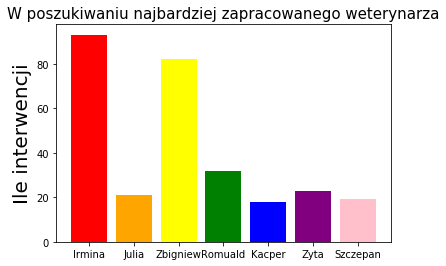

In [246]:
# wykres slupkowy
import numpy as np
objects=imie
y_pos=np.arange(len(objects))
performance=ile_int
plt.bar(y_pos,performance,align='center',color=['red','orange','yellow','green','blue','purple','pink'])
plt.xticks(y_pos,objects)
plt.title('W poszukiwaniu najbardziej zapracowanego weterynarza',size=15)
plt.ylabel('Ile interwencji',size=20)
plt.show()

In [249]:
mycursor.execute('select id_wolontariusz,zadanie from wolontariusze')
wolontariusze=mycursor.fetchall()

In [250]:
idw=[]
zadanie=[]
for i in range(0,len(wolontariusze)):
    idw.append(wolontariusze[i][0])
    zadanie.append(wolontariusze[i][1])

In [251]:
a=0
b=0
c=0
d=0
e=0
f=0
g=0
h=0
zadania=['karmienie','spacery','sprzatanie','kapiele','marketing','zabawa','tresura','inne']
lista=[a,b,c,d,e,f,g,h]
for i in range(0,len(idw)):
    for j in range(0,len(zadania)):
         if zadanie[i]==zadania[j]:
                lista[j]+=1

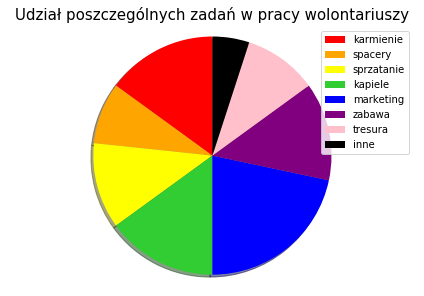

In [256]:
labels = zadania
sizes = lista
colors = ['red','orange','yellow','limegreen','blue','purple','pink','black']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.title("Udział poszczególnych zadań w pracy wolontariuszy",size=15)
plt.show()